# REGISTRY OF LIQUID HYDROCARBONS - LIMA

Analyzed by: [Samuel Duah Boadi](https://bit.ly/LinkedIn_SDBoadi)

In order to implement marketing activities within the hydrocarbon subsector, it is necessary to be registered in the Osinergmin Hydrocarbon Registry. This information is current as of August 2017.

This notebook analyzes two datasets and can obtained from [here](https://www.datosabiertos.gob.pe//dataset/registro-de-hidrocarburos-l%C3%ADquidos-agosto-2017-osinergmin) and [here](https://www.datosabiertos.gob.pe//dataset/registro-de-hidrocarburos-l%C3%ADquidos-agosto-2017-osinergmin).

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from deep_translator import GoogleTranslator

%matplotlib inline

In [2]:
# Load LPG and CNG Service Stations data and print out first 5 rows. 
df1 = pd.read_excel('data/EESSconGLPyGNV.xls', skiprows=5)
df1.head()

,No,EXPEDIENTE,REGISTRO,RUC,RAZON SOCIAL,DIRECCION OPERATIVA,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO DE ESTABLECIMIENTO,...,TANQUE 11,TANQUE 12,CAP.TOTAL CL (gl),CAP.TOTAL GLP (gl),CAP.TOTAL GNV,CAUDAL MAXIMO,FEC. EMISION,FEC. FIRMA,REPRESENTANTE,GLP EN CILINDROS
0,1,201700082393,125855-107-310517,20507401881,GASBRA S.A.C.,DEFENSORES DEL MORRO N° 1391 H.U. EL MORRO,LIMA,LIMA,CHORRILLOS,ESTACIÓN DE SERVICIO MIXTA (CL/GLP/GNV),...,NaN,NaN,12000,2500.0,1680.0,989.0,2017-01-06 00:00:00,2017-01-06 00:00:00,OSCAR ALEJANDRO MONTES GALLOSO,0
1,2,201200110868,7109-107-040612,20127765279,COESTI S.A.,"AV. TINGO MARIA N° 1172-1194, ESQ. CON RAUL PO...",LIMA,LIMA,LIMA,ESTACIÓN DE SERVICIO MIXTA (CL/GLP/GNV),...,NaN,NaN,20000,2500.0,1250.0,1080.0,2012-04-06 00:00:00,2012-04-06 00:00:00,LUIS FERNANDO JAGUANDE PIEROBON,0
2,3,201200161349,18881-107-230812,20506151547,ENERGIGAS S.A.C,AV. VENEZUELA N° 2180 ESQ. CON EL JR. YUNGAY,LIMA,LIMA,LIMA,ESTACIÓN DE SERVICIO MIXTA (CL/GLP/GNV),...,NaN,NaN,18000,2500.0,1250.0,950.0,23/08/2012,23/08/2012,DIEGO ALONSO CARLOS JOSE GONZALES POSADA DE CO...,0
3,4,201500122145,45439-107-290317,20510531923,MERRILL PERU ENTERPRISES S.A.C.,AV. JAIME BAUZATE Y MEZA CUADRA 5,LIMA,LIMA,LA VICTORIA,ESTACIÓN DE SERVICIO MIXTA (CL/GLP/GNV),...,NaN,NaN,27224,3200.0,2000.0,NaN,29/09/2015,2017-11-04 00:00:00,GUILLERMO SANCHEZ FLORES,0
4,5,201500110695,18440-107-310815,20430857861,GRIFOS DIANA S.A.C.,"AV. MEXICO 700, ESQUINA CALLE JUAN CASTRO",LIMA,LIMA,LA VICTORIA,ESTACIÓN DE SERVICIO MIXTA (CL/GLP/GNV),...,NaN,NaN,39200,3200.0,2000.0,1466.0,31/08/2015,31/08/2015,ELARD ESPINOZA ORIHUELA,0


In [3]:
# Load Service Stations with LPG Gas Center data and print out first 5 rows. 
df2 = pd.read_excel('data/EstacionesdeServicioconGasocentrodeGLP.xls', skiprows=5)
df2.head()

,No,EXPEDIENTE,REGISTRO,RUC,RAZON SOCIAL,DIRECCION OPERATIVA,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO DE ESTABLECIMIENTO,...,TANQUE 8,TANQUE 9,TANQUE 10,TANQUE 11,CAP.TOTAL CL (gl),CAP.TOTAL GLP (gl),FEC. EMISION,FEC. FIRMA,REPRESENTANTE,GLP EN CILINDROS
0,1,201600146297,120066-056-201016,20480082321,ESTACION DE SERVICIOS EL CARIBE S.A.C.,CARRETERA PANAMERICANA NORTE KM 778+500 - SECT...,LAMBAYEQUE,LAMBAYEQUE,LAMBAYEQUE,ESTACION DE SERVICIO-GLP AUTOMOTOR,...,NaN,NaN,NaN,NaN,33342,10000,20/10/2016,21/10/2016,SEFERINA CABRERA PEREZ DE VASQUEZ,0
1,2,201700059404,62995-056-300417,20393405695,PLANTA ENVASADORA DE GAS GASOCENTRO SELVA GAS ...,"LOTE 2, 2-A, 3 MZ. 174-A CENTRO POBLADO COMITE...",UCAYALI,CORONEL PORTILLO,YARINACOCHA,ESTACION DE SERVICIO-GLP AUTOMOTOR,...,NaN,NaN,NaN,NaN,15808,3200,30/04/2017,24/05/2017,MARITZA CACHAY BARRUETA,0
2,3,201300151255,7571-056-270913,20413401268,ESTACION DE SERVICIOS BENETON S.A.,URB.LAS BEGONIAS MZ E LOTE N° 14 CON FRENTE A ...,AREQUIPA,AREQUIPA,JOSE LUIS BUSTAMANTE Y RIVERO,ESTACION DE SERVICIO-GLP AUTOMOTOR,...,NaN,NaN,NaN,NaN,23294,3000,27/09/2013,25/06/2012,HUGO ALBERTO DEL CARPIO DEL PRATT,0
3,4,201600125383,18373-056-310816,10215437561,JANETE SOLAIDA MANTARI MANTARI,CARRETERA ICA PARCONA KM. 001 + 150 VISTA ALEGRE,ICA,ICA,PARCONA,ESTACION DE SERVICIO-GLP AUTOMOTOR,...,NaN,NaN,NaN,NaN,31000,4000,31/08/2016,16/05/2016,JANETE SOLAIDA MANTARI MANTARI,200
4,5,201600150923,9364-056-251016,20509054208,FULL SERVICE LA MOLINA S.A.C.,AV. LA MOLINA N° 2421,LIMA,LIMA,LA MOLINA,ESTACION DE SERVICIO-GLP AUTOMOTOR,...,C1:3000:SIN PRODUCTO C2:3000:SIN PRODUCTO,C1:4000:GASOHOL 97 PLUS,C1:4000:SIN PRODUCTO,4500:GAS LICUADO DE PETROLEO,60000,4500,25/10/2016,25/10/2016,NOEMI POBLETE ZAPATA,0


### Assessing Data

In [4]:
# Print the number of samples and columns in the two datasets
print('LPG and CNG Service Stations dataset')
print('The number of samples is', df1.shape[0], 
     '\nand the number of columns is', df1.shape[1])
print('_'*45)
print('Service Stations with LPG Gas Center dataset')
print('The number of samples is', df2.shape[0], 
     '\nand the number of columns is', df2.shape[1])

LPG and CNG Service Stations dataset
The number of samples is 144 
and the number of columns is 30
_____________________________________________
Service Stations with LPG Gas Center dataset
The number of samples is 895 
and the number of columns is 27


In [5]:
# Function to check null values in the selected columns
def check_null_values(data, col=False):
    '''
    Function to check whether a dataset has a null values 
    and the number of null values if they exist.

    Parameter: data - dataset to check
               col  - selected columns to check null the values

    '''
    if col == False:
        num = data.isnull().sum()
        ans = data.isnull().sum().any()
        if ans == True:
            print('Yes, there are null values in the dataset\n', num, 'null values')
        else:
            print('No, there are no null values in the dataset')
    else:
        num = data[col].isnull().sum()
        ans = data[col].isnull().sum().any()
        if ans == True:
            print('Yes, there are null values in the dataset\n', num, 'null values')
        else:
            print('No, there are no null values in selected columns in the dataset')

In [6]:
# LPG and CNG Service Stations dataset
check_null_values(df1)

Yes, there are null values in the dataset
 No                           0
EXPEDIENTE                   0
REGISTRO                     0
RUC                          0
RAZON SOCIAL                 0
DIRECCION OPERATIVA          0
DEPARTAMENTO                 0
PROVINCIA                    0
DISTRITO                     0
TIPO DE ESTABLECIMIENTO      0
TANQUE 1                     0
TANQUE 2                     0
TANQUE 3                     5
TANQUE 4                    27
TANQUE 5                    45
TANQUE 6                    75
TANQUE 7                   110
TANQUE 8                   133
TANQUE 9                   140
TANQUE 10                  143
TANQUE 11                  143
TANQUE 12                  143
CAP.TOTAL CL (gl)            0
CAP.TOTAL GLP (gl)           0
CAP.TOTAL GNV                0
CAUDAL MAXIMO               40
FEC. EMISION                 0
FEC. FIRMA                   0
REPRESENTANTE                2
GLP EN CILINDROS             0
dtype: int64 null values


In [7]:
# Service Stations with LPG Gas Center dataset
check_null_values(df2)

Yes, there are null values in the dataset
 No                           0
EXPEDIENTE                   0
REGISTRO                     0
RUC                          0
RAZON SOCIAL                 0
DIRECCION OPERATIVA          0
DEPARTAMENTO                 0
PROVINCIA                    0
DISTRITO                     0
TIPO DE ESTABLECIMIENTO      0
TANQUE 1                     0
TANQUE 2                     1
TANQUE 3                    30
TANQUE 4                   187
TANQUE 5                   375
TANQUE 6                   617
TANQUE 7                   768
TANQUE 8                   849
TANQUE 9                   877
TANQUE 10                  888
TANQUE 11                  890
CAP.TOTAL CL (gl)            0
CAP.TOTAL GLP (gl)           0
FEC. EMISION                 0
FEC. FIRMA                   0
REPRESENTANTE               24
GLP EN CILINDROS             0
dtype: int64 null values


In [8]:
# Check for duplicates in the dataset.
print('The number of duplicate rows in the LPG and CNG Service Stations dataset is', df1.duplicated().sum(), 
     '\nand the number of duplicate rows in the Service Stations with LPG Gas Center dataset is', df2.duplicated().sum())

The number of duplicate rows in the LPG and CNG Service Stations dataset is 0 
and the number of duplicate rows in the Service Stations with LPG Gas Center dataset is 0


In [9]:
# Inspect data types
df1.dtypes

No                           int64
EXPEDIENTE                   int64
REGISTRO                    object
RUC                          int64
RAZON SOCIAL                object
DIRECCION OPERATIVA         object
DEPARTAMENTO                object
PROVINCIA                   object
DISTRITO                    object
TIPO DE ESTABLECIMIENTO     object
TANQUE 1                    object
TANQUE 2                    object
TANQUE 3                    object
TANQUE 4                    object
TANQUE 5                    object
TANQUE 6                    object
TANQUE 7                    object
TANQUE 8                    object
TANQUE 9                    object
TANQUE 10                   object
TANQUE 11                   object
TANQUE 12                   object
CAP.TOTAL CL (gl)            int64
CAP.TOTAL GLP (gl)         float64
CAP.TOTAL GNV              float64
CAUDAL MAXIMO              float64
FEC. EMISION                object
FEC. FIRMA                  object
REPRESENTANTE       

In [10]:
df2.dtypes

No                          int64
EXPEDIENTE                  int64
REGISTRO                   object
RUC                         int64
RAZON SOCIAL               object
DIRECCION OPERATIVA        object
DEPARTAMENTO               object
PROVINCIA                  object
DISTRITO                   object
TIPO DE ESTABLECIMIENTO    object
TANQUE 1                   object
TANQUE 2                   object
TANQUE 3                   object
TANQUE 4                   object
TANQUE 5                   object
TANQUE 6                   object
TANQUE 7                   object
TANQUE 8                   object
TANQUE 9                   object
TANQUE 10                  object
TANQUE 11                  object
CAP.TOTAL CL (gl)           int64
CAP.TOTAL GLP (gl)          int64
FEC. EMISION               object
FEC. FIRMA                 object
REPRESENTANTE              object
GLP EN CILINDROS            int64
dtype: object

### Cleaning Data
The dataset is clean.<br> 
Three changes will be made in the dataset:
* Remove unwanted columns.
* Filter _LIMA_ province.
* Change datatype of _FEC. EMISION_ & _FEC. FIRMA_ to date.
* Translate all column names and values in two columns (_SEX_ & _INCOME SERVICE_).

In [11]:
# Remove unwanted columns

# Columns not needed for the analysis
drop_col = ['EXPEDIENTE', 'No', 'REGISTRO', 'TANQUE 1', 'TANQUE 10', 'TANQUE 11', 'TIPO DE ESTABLECIMIENTO',
       'TANQUE 2', 'TANQUE 3', 'TANQUE 4', 'TANQUE 5', 'TANQUE 6', 'TANQUE 7', 'TANQUE 8', 'TANQUE 9', 'TANQUE 12']

df1.drop(columns=drop_col, inplace=True, errors='ignore')
df2.drop(columns=drop_col, inplace=True, errors='ignore')

In [12]:
# extract only Lima Province

df1_lima = df1[df1['PROVINCIA'] == 'LIMA']
df2_lima = df2[df2['PROVINCIA'] == 'LIMA']

In [ ]:
# change to datetime
col_date = ['FEC. EMISION', 'FEC. FIRMA']

for col in col_date:
    df1_lima[col] = df1_lima[col].astype('datetime64[ns]')
    df2_lima[col] = df2_lima[col].astype('datetime64[ns]')

In [ ]:
# translate column heading from Spanish to English

# Unique column headings in the two datasets
columns = np.unique(np.concatenate((df1_lima.columns.values, df2_lima.columns.values)))

# translate to english
columns_en = []
n = columns.shape[0]
for i in range(n):
    # translate to english
    columns_en.append(GoogleTranslator(source='es', target='en').translate(columns[i]))
    i += 1

# create a dictionary of spanish : english
es_en_dict = dict(map(lambda i,j : (i,j) , columns, columns_en))

# replace spanish values with english in the column
df1_lima.rename(columns=es_en_dict, inplace=True)
df2_lima.rename(columns=es_en_dict, inplace=True)

### Visualize Data

## Hydrocarbon Registry - LPG and CNG Service Stations - August 2017

In [15]:
df1_lima.head(5)

,R.U.C.,BUSINESS NAME,OPERATIONAL DIRECTION,DEPARTMENT,PROVINCE,DISTRICT,TOTAL CAP. CL (gl),TOTAL LPG CAP (gl),TOTAL CNG CAP,MAXIMUM FLOW,FEC. ISSUE,FEC. SIGNATURE,REPRESENTATIVE,LPG IN CYLINDERS
0,20507401881,GASBRA S.A.C.,DEFENSORES DEL MORRO N° 1391 H.U. EL MORRO,LIMA,LIMA,CHORRILLOS,12000,2500.0,1680.0,989.0,2017-01-06,2017-01-06,OSCAR ALEJANDRO MONTES GALLOSO,0
1,20127765279,COESTI S.A.,"AV. TINGO MARIA N° 1172-1194, ESQ. CON RAUL PO...",LIMA,LIMA,LIMA,20000,2500.0,1250.0,1080.0,2012-04-06,2012-04-06,LUIS FERNANDO JAGUANDE PIEROBON,0
2,20506151547,ENERGIGAS S.A.C,AV. VENEZUELA N° 2180 ESQ. CON EL JR. YUNGAY,LIMA,LIMA,LIMA,18000,2500.0,1250.0,950.0,2012-08-23,2012-08-23,DIEGO ALONSO CARLOS JOSE GONZALES POSADA DE CO...,0
3,20510531923,MERRILL PERU ENTERPRISES S.A.C.,AV. JAIME BAUZATE Y MEZA CUADRA 5,LIMA,LIMA,LA VICTORIA,27224,3200.0,2000.0,NaN,2015-09-29,2017-11-04,GUILLERMO SANCHEZ FLORES,0
4,20430857861,GRIFOS DIANA S.A.C.,"AV. MEXICO 700, ESQUINA CALLE JUAN CASTRO",LIMA,LIMA,LA VICTORIA,39200,3200.0,2000.0,1466.0,2015-08-31,2015-08-31,ELARD ESPINOZA ORIHUELA,0


In [16]:
df1_lima.describe()

,R.U.C.,TOTAL CAP. CL (gl),TOTAL LPG CAP (gl),TOTAL CNG CAP,MAXIMUM FLOW,LPG IN CYLINDERS
count,1.120000e+02,112.000000,112.000000,112.000000,92.000000,112.000000
mean,2.032501e+10,28101.607143,2886.443393,3576.644643,1308.228261,62.857143
std,1.781131e+08,12186.622925,701.389645,18771.185603,726.033815,163.890914
min,2.010003e+10,5000.000000,1320.000000,0.000000,0.000000,0.000000
25%,2.012777e+10,20000.000000,2500.000000,1250.000000,971.000000,0.000000
50%,2.033003e+10,27750.000000,2950.000000,1250.000000,1191.000000,0.000000
75%,2.050926e+10,36000.000000,3200.000000,2000.000000,1415.000000,0.000000
max,2.056569e+10,82000.000000,5150.000000,199920.000000,5080.000000,720.000000


In [17]:
def bar_plt(df, col, top_k, r=15):
    '''
    A function to return a univariate visualization, a bar chart
    
    Parameters:   df    -  the dataframe
                  col   -  a qualitative variable
                  top_k -  Top specified value (k) of qualitative variable
                  r     -  xticks rotation
                 
    returns:      a bar chart
    '''
    
    blue_color = sb.color_palette()[0]
    col_order = df[col].value_counts().head(top_k).index
    
    sb.countplot(data=df, x=col, color=blue_color, order=col_order)
    plt.title('Top {} {} Distribution'.format(top_k, col))
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=r);

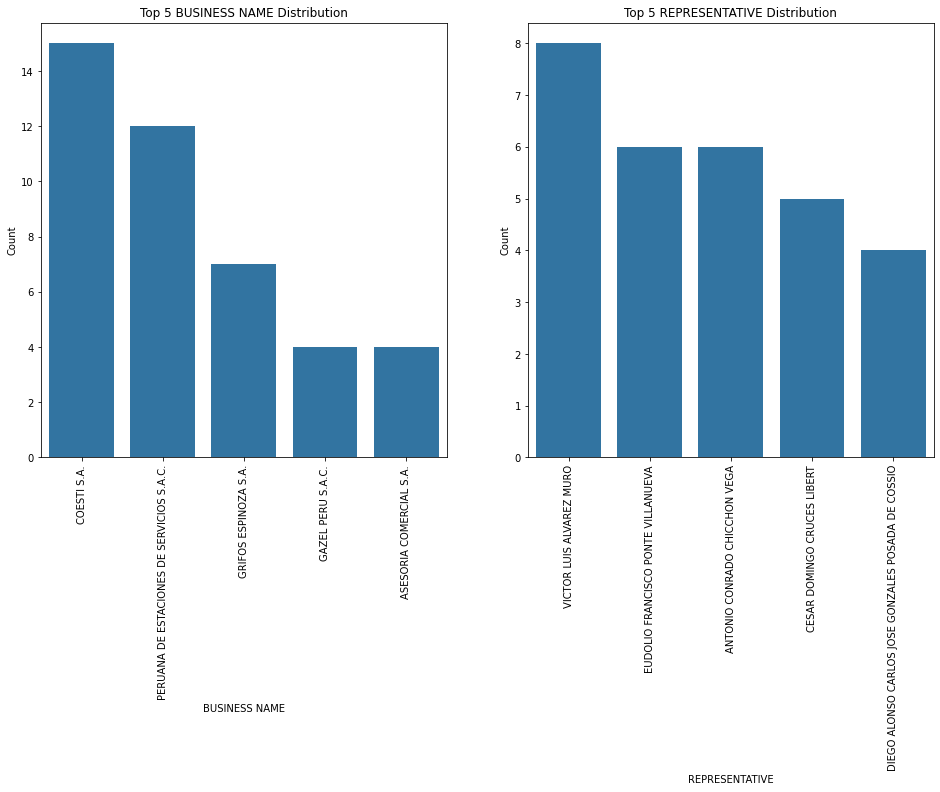

In [18]:
# a bar plot of BUSINESS NAME and REPRESENTATIVE

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
bar_plt(df1_lima, 'BUSINESS NAME', 5, 90)

plt.subplot(1, 2, 2)
bar_plt(df1_lima, 'REPRESENTATIVE', 5, 90)

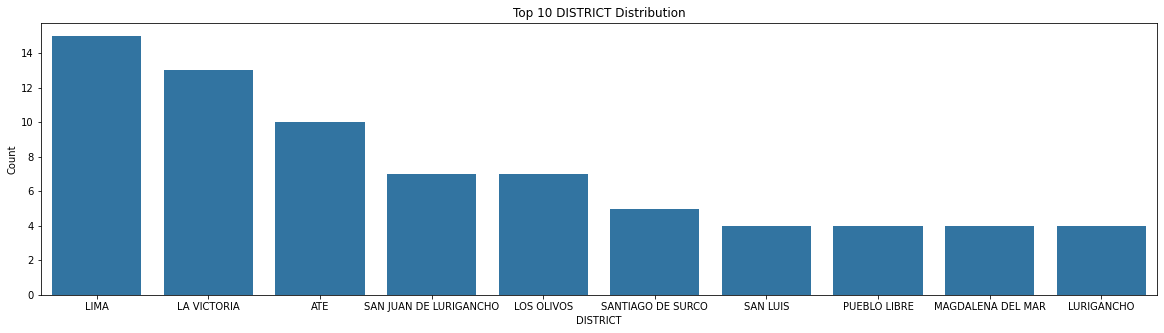

In [19]:
# a bar plot of DISTRICT

plt.figure(figsize = [20, 5])
bar_plt(df1_lima, 'DISTRICT', 10, 0)

In [20]:
def box_violin_plts(x, y, df, r=15):
    '''
    A function to return a bivariate visualization, 
    that is, plots representing the relationship between 
    two variables.
    One variable should be a qualitative varible and the other
    a quatitative variable.
    
    Parameters:       df  -  the dataframe
                 x & y  -  a qualitative/quantitative variable
                 
    returns:      two plots in one figure
                  box plot on the left and
                  a violin plot on the right 
    '''
    
    
    # TWO PLOTS IN ONE FIGURE
    blue_color = sb.color_palette()[0]
    plt.figure(figsize = [16, 5])

    # LEFT plot: box plot
    plt.subplot(1, 2, 1)
    col_order = df[x].value_counts().head(5).index
    ax = sb.boxplot(data=df, x=x, y=y, color=blue_color, order=col_order)
    plt.title(f"Top 5 Distribution of {y} by {x}", weight='bold')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=r);
    

    # RIGHT plot: violin plot
    plt.subplot(1, 2, 2)
    sb.violinplot(data=df, x=x, y=y, color=blue_color, innner='quartile', order=col_order)
    plt.title(f"Top 5 Distribution of {y} By {x}", weight='bold')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=r)
    plt.ylim(ax.get_ylim()); # set y-axis limits to be same as left plot

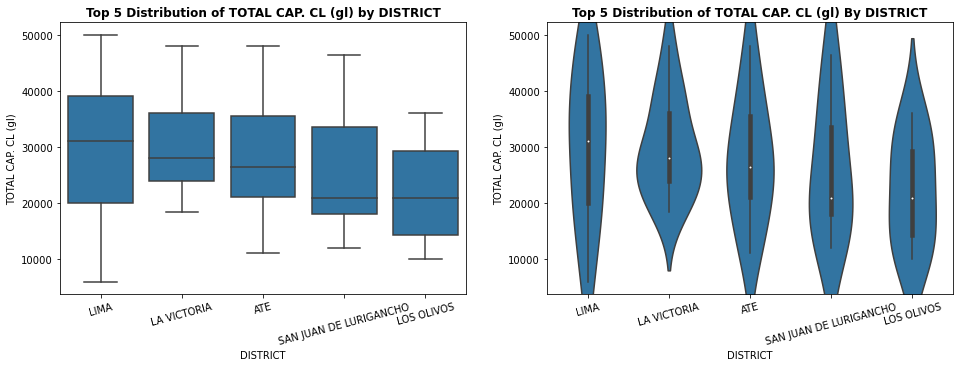

In [21]:
box_violin_plts('DISTRICT', 'TOTAL CAP. CL (gl)', df1_lima)

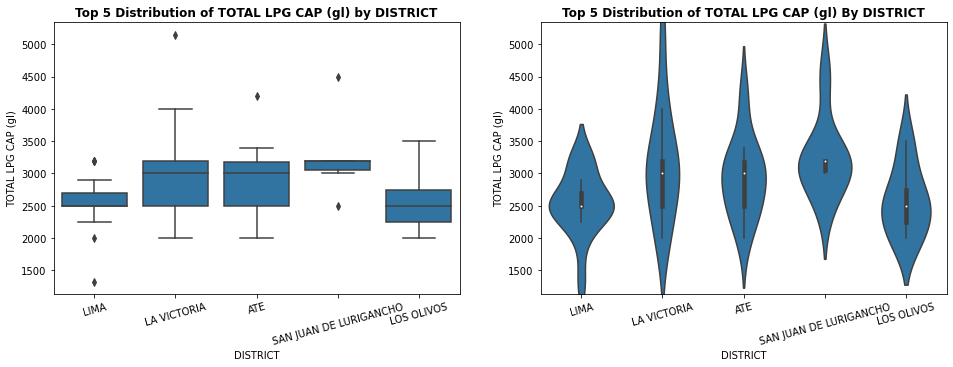

In [22]:
box_violin_plts('DISTRICT', 'TOTAL LPG CAP (gl)', df1_lima)

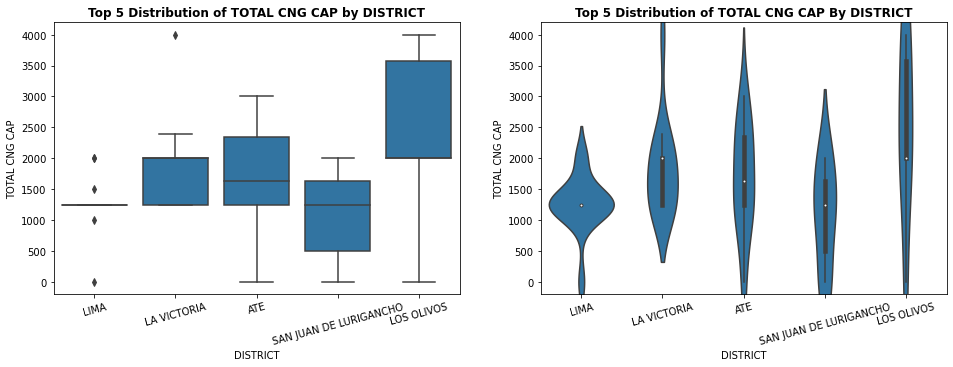

In [23]:
box_violin_plts('DISTRICT', 'TOTAL CNG CAP', df1_lima)

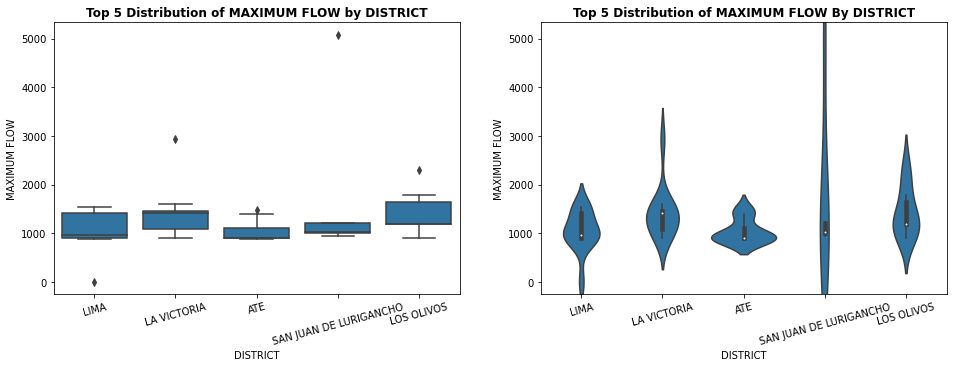

In [24]:
box_violin_plts('DISTRICT', 'MAXIMUM FLOW', df1_lima)

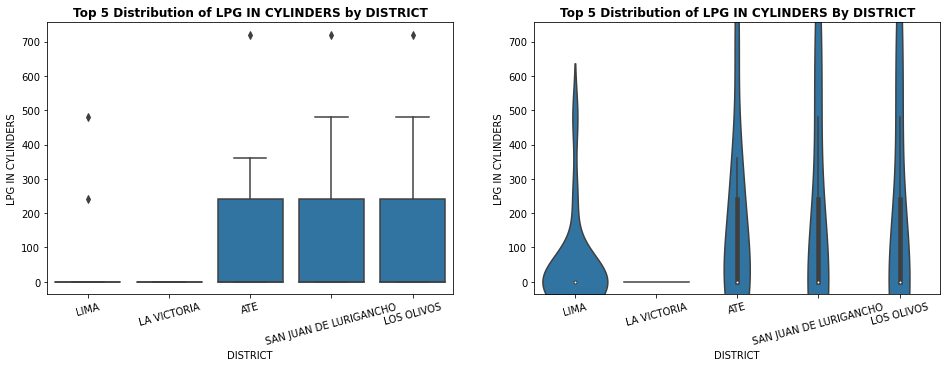

In [25]:
box_violin_plts('DISTRICT', 'LPG IN CYLINDERS', df1_lima)

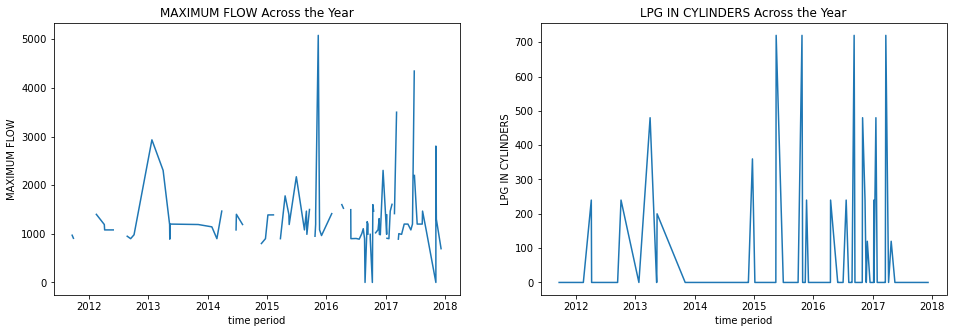

In [26]:
plt.figure(figsize = [16, 5])
df1_sort = df1_lima.sort_values(by=['FEC. ISSUE'])
    
plt.subplot(1, 2, 1)
plt.errorbar(data=df1_sort, x='FEC. ISSUE', y='MAXIMUM FLOW')
plt.xlabel('time period')
plt.ylabel('MAXIMUM FLOW')
plt.title('MAXIMUM FLOW Across the Year');

plt.subplot(1, 2, 2)
plt.errorbar(data=df1_sort, x='FEC. ISSUE', y='LPG IN CYLINDERS')
plt.xlabel('time period')
plt.ylabel('LPG IN CYLINDERS')
plt.title('LPG IN CYLINDERS Across the Year');

## Hydrocarbon Registry - Service Stations with LPG Gas Center - August 2017

In [27]:
df2_lima.head(5)

,R.U.C.,BUSINESS NAME,OPERATIONAL DIRECTION,DEPARTMENT,PROVINCE,DISTRICT,TOTAL CAP. CL (gl),TOTAL LPG CAP (gl),FEC. ISSUE,FEC. SIGNATURE,REPRESENTATIVE,LPG IN CYLINDERS
4,20509054208,FULL SERVICE LA MOLINA S.A.C.,AV. LA MOLINA N° 2421,LIMA,LIMA,LA MOLINA,60000,4500,2016-10-25,2016-10-25,NOEMI POBLETE ZAPATA,0
6,20417752979,CORPORACION GEAMAR S.A.C.,"AV. CARLOS IZAGUIRRE MZ. D LTES. 4, 5 Y 6. URB...",LIMA,LIMA,SAN MARTIN DE PORRES,18000,2500,2014-09-10,2014-09-10,SAMUEL ELIAS ASTUDILLO LEON,0
7,20330033313,PERUANA DE ESTACIONES DE SERVICIOS S.A.C.,AV. RAFAEL ESCARDO N° 250,LIMA,LIMA,SAN MIGUEL,20000,2750,2012-03-15,2012-03-15,MANUEL THOMAS HERRERA-RAMBLA TAYLOR,240
12,20100100551,A.B.G. S.A.C.,"AV. TUPAC AMARU KM.16,5",LIMA,LIMA,CARABAYLLO,40000,4000,2012-08-02,2013-04-07,JORGE ALEJANDRO VICTOR MANUEL BALLESTEROS ALARCO,0
15,20127765279,COESTI S.A.,"AV. MELGAREJO, ESQ. CON LA AV. UNIVERSIDAD",LIMA,LIMA,LA MOLINA,24000,3000,2017-01-13,2017-01-17,JORGE EDUARDO CARRASCO FIGUEROA,0


In [28]:
df2_lima.describe()

,R.U.C.,TOTAL CAP. CL (gl),TOTAL LPG CAP (gl),LPG IN CYLINDERS
count,1.880000e+02,188.000000,188.000000,188.000000
mean,2.013279e+10,24567.569149,2972.867021,112.978723
std,1.672365e+09,11452.070523,826.873804,288.046453
min,1.006967e+10,5000.000000,1800.000000,0.000000
25%,2.029693e+10,16000.000000,2500.000000,0.000000
50%,2.050159e+10,24000.000000,3000.000000,0.000000
75%,2.051731e+10,32000.000000,3200.000000,120.000000
max,2.060230e+10,64000.000000,5800.000000,3200.000000


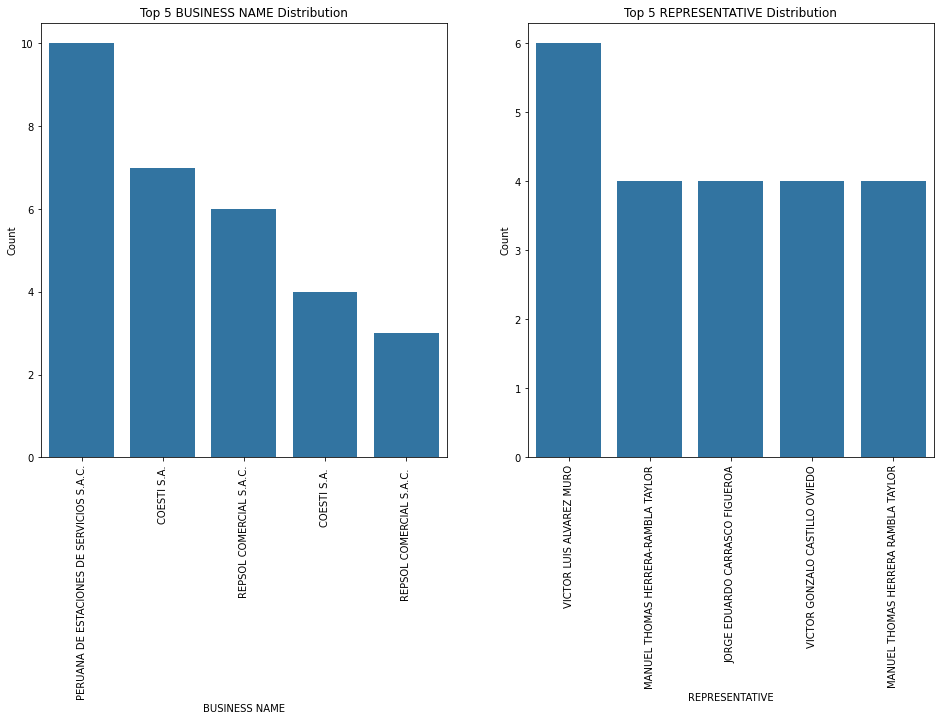

In [29]:
# a bar plot of BUSINESS NAME and REPRESENTATIVE

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
bar_plt(df2_lima, 'BUSINESS NAME', 5, 90)

plt.subplot(1, 2, 2)
bar_plt(df2_lima, 'REPRESENTATIVE', 5, 90)

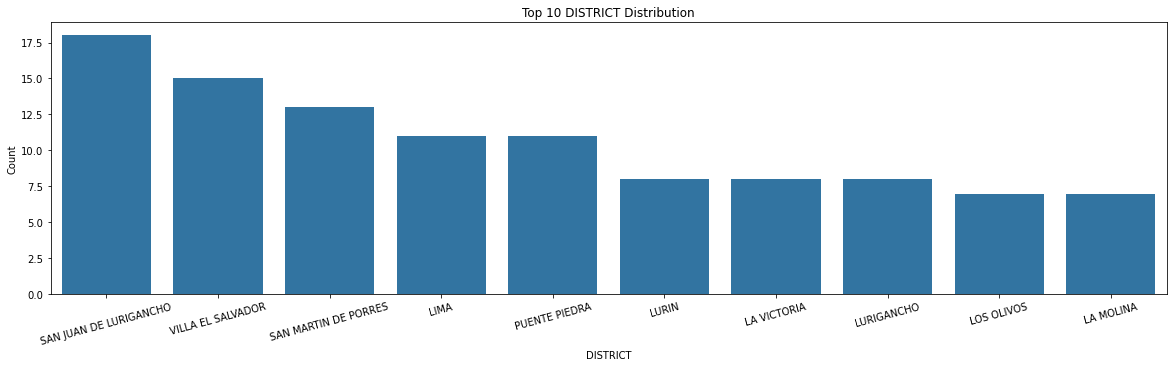

In [30]:
# a bar plot of DISTRICT

plt.figure(figsize = [20, 5])
bar_plt(df2_lima, 'DISTRICT', 10, 15)

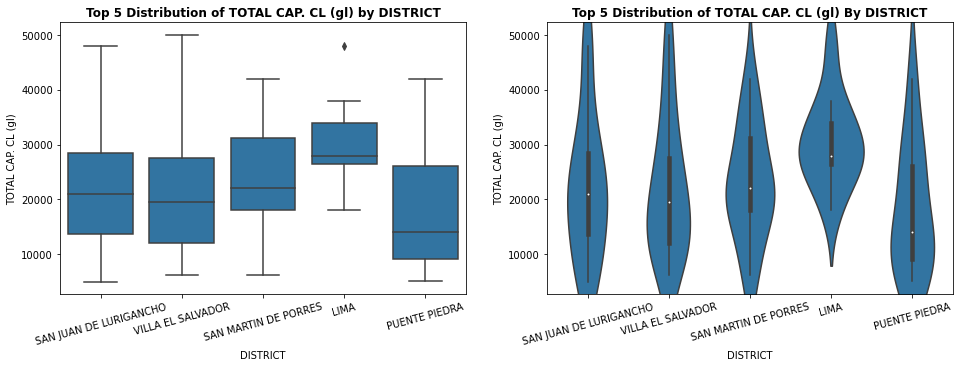

In [31]:
box_violin_plts('DISTRICT', 'TOTAL CAP. CL (gl)', df2_lima)

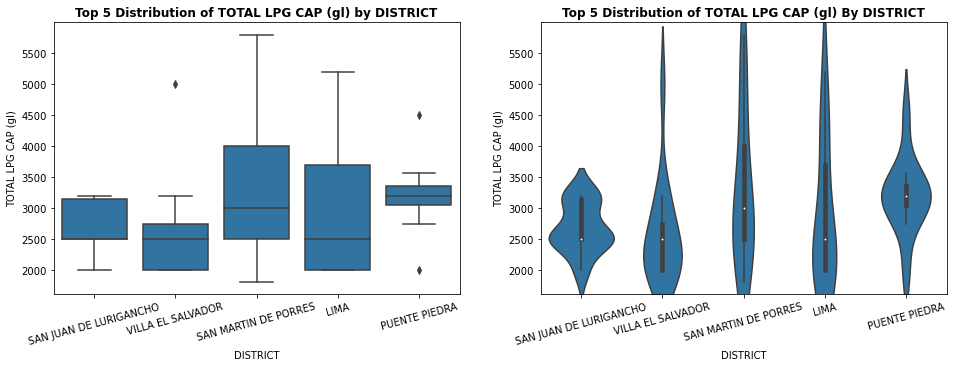

In [32]:
box_violin_plts('DISTRICT', 'TOTAL LPG CAP (gl)', df2_lima)

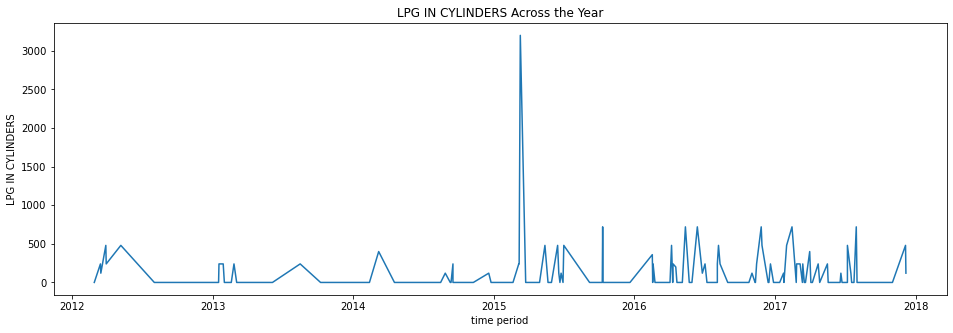

In [33]:
plt.figure(figsize = [16, 5])

# remove obervations before 2012
df = df2_lima[df2_lima['FEC. ISSUE'] >= '2012-01-01']

df2_sort = df.sort_values(by=['FEC. ISSUE'])

plt.errorbar(data=df2_sort, x='FEC. ISSUE', y='LPG IN CYLINDERS')
plt.xlabel('time period')
plt.ylabel('LPG IN CYLINDERS')
plt.title('LPG IN CYLINDERS Across the Year');